In [67]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [68]:
df = pd.read_csv("apple_quality.csv")

In [69]:
df = df.drop(columns=['A_id'])

In [70]:
df = df.dropna() # Удаление пустых значений
# Преобразование категориальной переменной 'Quality' в числовую
label_encoder = LabelEncoder()
df['Quality'] = label_encoder.fit_transform(df['Quality'])  # "good" -> 1, "bad" -> 0

In [71]:
X = df.drop(columns=['Quality'])
y = df['Quality']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Разделение на обучающую и тестовую

In [73]:
# Обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Оценка модели 
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       401
           1       0.89      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800

Accuracy: 0.89625


In [77]:
# Сохранение модели
joblib.dump(model, 'apple_quality_model.pkl')

['apple_quality_model.pkl']

<Axes: >

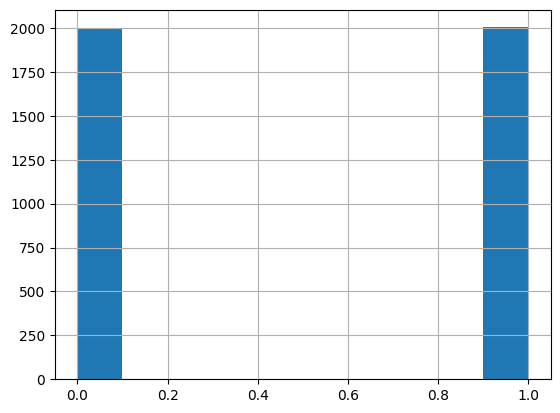

In [75]:
y.hist()